In [1]:
### KMC reaction, all fragments are swipped off

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pi = np.pi
import pickle
import random 

In [2]:
with open("sequences", "rb") as fp:   # Unpickling the input data 
    global_seq_list = pickle.load(fp)

In [3]:
global_seq_list

[[(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 'tail'), (0, 'tail')],
 [(1.0, 

## Now ready for MC

In [5]:
#print(global_seq_list[1]) removing tails of length 0
data_list = []
for seque in global_seq_list:
    ans_temp = []
    for elem in seque:
        if elem[0]!=0:
            ans_temp.append(elem)
    data_list.append(ans_temp)
print(data_list[-1])            

[(15, 'tail'), (2, 'loop'), (5, 'loop'), (2, 'loop'), (2, 'loop'), (14, 'loop'), (7, 'loop'), (48, 'loop'), (3, 'loop'), (7, 'loop'), (7, 'loop'), (2, 'loop'), (4, 'loop'), (3, 'loop'), (2, 'loop'), (18, 'loop'), (8, 'loop'), (3, 'loop'), (4, 'loop'), (29, 'loop'), (2, 'loop'), (2, 'loop'), (6, 'loop'), (2, 'loop'), (4, 'loop'), (3, 'loop'), (2, 'loop'), (19, 'tie'), (2, 'loop'), (32, 'tie'), (15, 'loop'), (8, 'loop'), (8, 'loop'), (22, 'loop'), (6, 'loop'), (5, 'loop'), (11, 'loop'), (4, 'loop'), (2, 'loop'), (2, 'loop'), (3, 'loop'), (2, 'loop'), (2, 'loop'), (15, 'loop'), (3, 'loop'), (3, 'loop'), (3, 'loop'), (2, 'loop'), (4, 'tail')]


In [6]:
data = [(80,'tail'), (9,'tie'), (8,'loop'), (5,'tail'), (3,'tail'), (12, 'loop'), (40,'tie'), (1,'tail')] 
# a hypothetical test case

In [7]:
def cumu_length_list(lis):
    '''cumulative length of amorphous monomers'''
    to_add = 0
    ans_list = []
    for i in lis:
        to_add += i[0]
        ans_list.append(int(to_add))
    #print('cumulative length:',ans_list)
    return ans_list

cumu_length_list(data)

[80, 89, 97, 102, 105, 117, 157, 158]

In [8]:

prob = 0.01 ### probability of degradation

def choose_monomers(lis, prob):
    '''gives monomer-indices+1 for reaction'''
    cum_list = cumu_length_list(lis)
    tot_monomers = cum_list[-1]
    picked_list = []
    for n in range(1,tot_monomers+1):
        if random.random()<=prob: ### probability here
            picked_list.append(n) 
    #list_picked = monoms_list
    #print('picked list:', picked_list)
    return picked_list

In [9]:
choose_monomers(data)

[82, 84]

In [10]:
## utility functions

def fragments(lis):#only the inner fragments
    if len(lis)<=1:
        return []
    frag_lis = [lis[k+1]-lis[k] for k in range(len(lis)-1)]
    return frag_lis

print(fragments([1,5]))

def flatten(lis):
    ans = []
    for lis_elem in lis:
        for elem in lis_elem:
            ans.append(elem)
    return ans

[4]


## Reaction step

In [2]:

def get_reaction(lis):
    '''takes an old sequence 'lis' and gives a new sequence (or pair list) after one reaction step'''
    #lis_temp = lis.copy()
    ans = []
    removed_fragments = []#list of their length
    #lis = [(8,'t'), (9,'tie'), (8,'l'), (5,'t'), (3,'t'), (12, 'l'), (40,'tie'), (1,'t')]
    monoms_cum_index_list = cumu_length_list(lis)# [8, 17, 25, 30, 33, 45, 85, 86]
    monoms_index_list = choose_monomers(lis)# [3, 19, 21, 23, 28, 29, 36, 41, 56, 75] - reaction cites
    #print(monoms_index_list)
    for index1, elem1 in enumerate(monoms_cum_index_list):
        sub_chain = lis[index1]
        length, Type = sub_chain[0], sub_chain[1]
        list_temp = []
        #print(monoms_index_list)
        
        for element in monoms_index_list:
            if element<=elem1:
                list_temp.append(element)
                #monoms_index_list.remove(element) - figure out why this doesn't work
        #print(list_temp)
        monoms_index_list =  sorted(list(set(monoms_index_list)- set(list_temp))) #remaining
        
        
        if list_temp == []:
            ans += [sub_chain]
            
        else:
            fragment1 = elem1 - list_temp[-1] #inner remaining fragment
            fragment2 = length - fragment1 - (list_temp[-1]-list_temp[0]) # the free fragment at the middle is ignored
            if Type == 'tail':
                ans += [(fragment1, 'tail')]
                removed_fragments += [fragment2] + fragments(list_temp)
            else:
                ans += [(fragment1, 'tail'), (fragment2, 'tail')]
                removed_fragments += fragments(list_temp)
        #print(monoms_index_list)
        #print(elem1, list_temp)
    ans = [i for i in ans if i[0]!=0]
    return [ans, removed_fragments]# remaining, removed
    #print(ans)
    
#get_reaction(data)

In [12]:
def count_monomers(lis):
    '''returns total (remaining) MONOMER numbers for ties, loops, tails, and total'''
    ct_ties = 0
    ct_loops = 0
    ct_tails = 0
    ct_total = 0
    for seq in lis:
        tie, loop, tail = 0, 0, 0
        for elem in seq:
            if elem[1] == 'tie':
                tie += elem[0]
            elif elem[1] == 'loop':
                loop += elem[0]
            else:
                tail += elem[0]
            tot = tie + loop + tail
        ct_ties += tie
        ct_loops += loop
        ct_tails += tail
        ct_total += tot
    return[ct_ties, ct_loops, ct_tails, ct_total]

count_monomers(data_list)

[279290, 3250921, 1476474.0, 5006685.0]

In [13]:
from itertools import chain

tie_list, loop_list, tail_list = [], [], []
for sequ in global_seq_list:
    tie = [elem[0] for elem in sequ if elem[1] == 'tie'] #tie_lengths collected
    loop = [elem[0] for elem in sequ if elem[1] == 'loop']
    tail = [elem[0] for elem in sequ if (elem[1] == 'tail' and elem[0]!=0) ]# remove 0 length tails
    tie_list.extend(tie)
    loop_list.extend(loop)
    tail_list.extend(tail)

data_copy = data_list.copy()
#time = 1000
time_list = [0]
fragment_mean = []
fragment_list = []

tie_length_list = [tie_list]
loop_length_list = [loop_list]
avg_tie_length = [np.mean(tie_list)]
avg_loop_length = [np.mean(loop_list)]

ties, loops, tails, total = count_monomers(data_copy)
remaining_ties,remaining_loops,remaining_tails,remaining_monoms = [ties],[loops],[tails],[total]



In [14]:
### Now run the reaction for several time steps and store the evolution of mass for various components
#prob = 0.005 ### probability

time = 2000

for i in range(1,time+1):
    print(i)
    time_list.append(i)
    react_ans = [get_reaction(sequence) for sequence in data_copy]
    ans = [elem[0] for elem in react_ans if elem[0] !=[]] # sequences
    frag_list = [elem[1] for elem in react_ans if elem[1] !=[]]# a list of fragments for each chain (sequence)
    #frag_list = list(chain(elem for elem in frag_list))# chain
    frag_list = flatten(frag_list)
    #print(np.mean(frag_list))
    
    loop_list0, tie_list0 = [], []
    for seq in ans:
        for elem in seq:
            if elem[1]=='tie':
                tie_list0.append(elem[0])
            elif elem[1]=='loop':
                loop_list0.append(elem[0])
    
    tie_length_list.append(tie_list0)
    loop_length_list.append(loop_list0)
    if tie_list0 != []:
        avg_tie_length.append(np.mean(tie_list0))
    else:
        avg_tie_length.append(np.nan)
        
    if loop_list0 != []:
        avg_loop_length.append(np.mean(loop_list0))
    else:
        avg_loop_length.append(np.nan)
        
    ties, loops, tails, total = count_monomers(ans)
    
    remaining_ties.append(ties) # these are the no of monomers, not the no of ties
    remaining_loops.append(loops)
    remaining_tails.append(tails)
    remaining_monoms.append(total)
    fragment_list.append(frag_list)
    if frag_list != []:
        fragment_mean.append(np.mean(frag_list))
    else:
        fragment_mean.append(np.nan)
    
    data_copy = ans
   
    if len(ans)==0: # nothing left - i.e the last tail is out
        break
        
print(len(data_list))
print(len(data_copy))
#print(fragment_list)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [15]:
### Analyze the data generated

<ipython-input-16-70e7cbb35d9c>:3: RuntimeWarning: divide by zero encountered in log
  ax.plot(time_list, np.log(remaining_monoms), color = 'r', linewidth = 2)
<ipython-input-16-70e7cbb35d9c>:4: RuntimeWarning: divide by zero encountered in log
  ax.plot(time_list, np.log(remaining_ties), color = 'b', linewidth = 2)
<ipython-input-16-70e7cbb35d9c>:5: RuntimeWarning: divide by zero encountered in log
  ax.plot(time_list, np.log(remaining_loops), color = 'g', linewidth = 2)
<ipython-input-16-70e7cbb35d9c>:6: RuntimeWarning: divide by zero encountered in log
  ax.plot(time_list, np.log(remaining_tails), color = 'm', linewidth = 2)


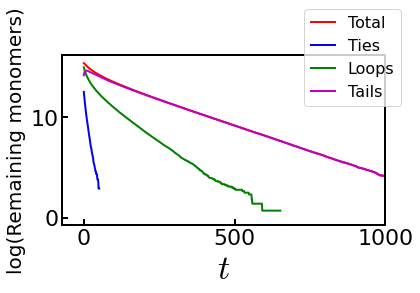

11.639947724587346


In [16]:
ax = plt.axes()

ax.plot(time_list, np.log(remaining_monoms), color = 'r', linewidth = 2)
ax.plot(time_list, np.log(remaining_ties), color = 'b', linewidth = 2)
ax.plot(time_list, np.log(remaining_loops), color = 'g', linewidth = 2)
ax.plot(time_list, np.log(remaining_tails), color = 'm', linewidth = 2)
#ax.plot(time_list[1:], fragment_mean, color = 'y')

plt.legend(('Total', 'Ties', 'Loops', 'Tails'),
          shadow=False, loc=(0.75, 0.7), handlelength=1.5, fontsize=16)

ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 6, width = 2, labelsize = 22)
ax.tick_params(axis = 'both', which = 'minor', direction = 'in')
plt.setp(ax.spines.values(), linewidth=2)

plt.xlabel(r'$t$', {'fontsize': 34})
plt.ylabel('log(Remaining monomers)', {'fontsize': 20})
#ax.set_yscale('symlog')
ax.set_xlim(xmax = 1000)

plt.style.use('classic')
plt.tight_layout()

plt.savefig('fig_s1')
plt.show()
print(remaining_loops[0]/remaining_ties[0])

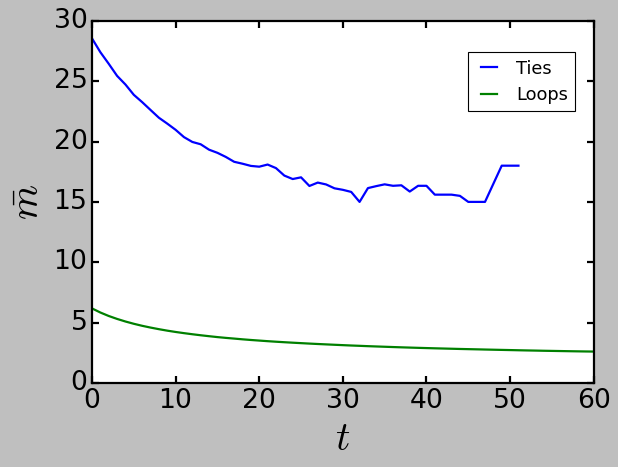

In [17]:
ax = plt.axes()
ax.plot(time_list, avg_tie_length, color = 'b', linewidth = 2)
ax.plot(time_list, avg_loop_length, color = 'g', linewidth = 2)
#fragment_mean = [i if str(i)!='nan' else 0 for i in fragment_mean]
#print(fragment_mean[-1])

plt.legend(('Ties', 'Loops'),
          shadow=False, loc=(0.75, 0.75), handlelength=1.5, fontsize=16)

ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 6, width = 2, labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', direction = 'in')
plt.setp(ax.spines.values(), linewidth=2)

plt.xlabel(r'$t$', {'fontsize': 36})
plt.ylabel(r'$\bar{m}$', {'fontsize': 36})
#ax.set_yscale('log')
##ax.set_yscale('log')

plt.tight_layout()

ax.set_xlim(xmax = 60)
plt.savefig('avg_length_vs_time')
plt.show()

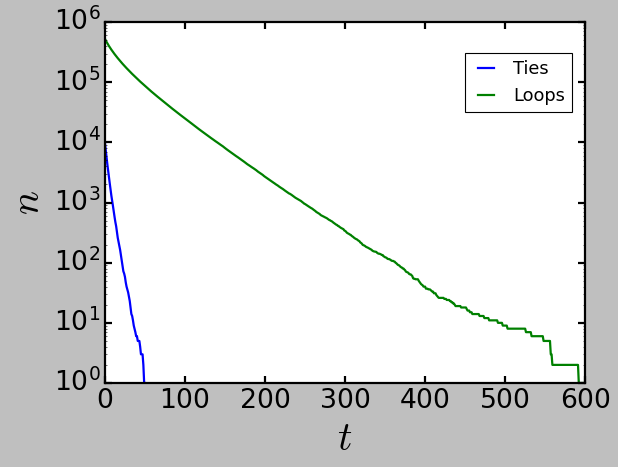

12.792662819455895


In [18]:
ax = plt.axes()
no_of_ties = [len(seq) for seq in tie_length_list]
no_of_loops = [len(seq) for seq in loop_length_list]
tie0, loop0 = no_of_ties[0], no_of_loops[0]
tie1, loop1 = no_of_ties[1], no_of_loops[1]

ax.plot(time_list, np.array(no_of_ties), color = 'b', linewidth = 2)
ax.plot(time_list, np.array(no_of_loops), color = 'g', linewidth = 2)
#fragment_mean = [i if str(i)!='nan' else 0 for i in fragment_mean]
#print(fragment_mean[-1])

plt.legend(('Ties', 'Loops'),
          shadow=False, loc=(0.75, 0.75), handlelength=1.5, fontsize=16)

ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 6, width = 2, labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', direction = 'in')
plt.setp(ax.spines.values(), linewidth=2)

plt.xlabel(r'$t$', {'fontsize': 36})
plt.ylabel(r'$n$', {'fontsize': 36})
ax.set_yscale('log')
#ax.set_xscale('log')

plt.tight_layout()

ax.set_xlim(xmax = 600)
#ax.set_ylim(ymin = 0)
plt.savefig('number_vs_time')
plt.show()
print((no_of_loops[0] - no_of_loops[1])/(no_of_ties[0] - no_of_ties[1]))


<ipython-input-34-3ca22ca0b417>:2: RuntimeWarning: divide by zero encountered in log
  tiesn = np.log(np.array(no_of_ties))
<ipython-input-34-3ca22ca0b417>:3: RuntimeWarning: divide by zero encountered in log
  loopsn = np.log(np.array(no_of_loops) )
<ipython-input-34-3ca22ca0b417>:5: RuntimeWarning: invalid value encountered in double_scalars
  dlogn_ties = [tiesn[i+1] - tiesn[i] for i in range(leng-1)]
<ipython-input-34-3ca22ca0b417>:6: RuntimeWarning: invalid value encountered in double_scalars
  dlogn_loops = [loopsn[i+1] - loopsn[i] for i in range(leng-1)]


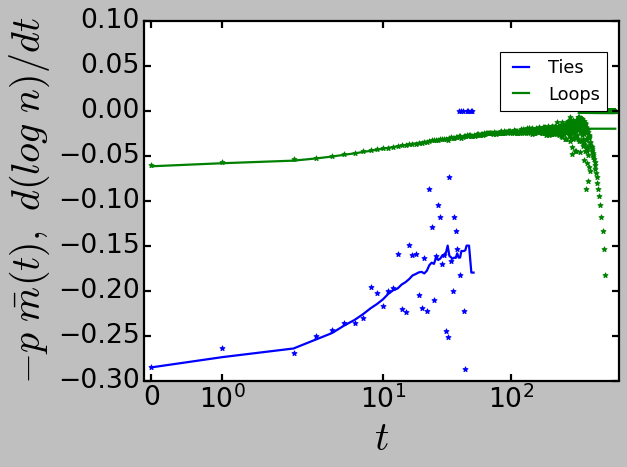

In [34]:
ax = plt.axes()
tiesn = np.log(np.array(no_of_ties))
loopsn = np.log(np.array(no_of_loops) )
leng = len(tiesn)
dlogn_ties = [tiesn[i+1] - tiesn[i] for i in range(leng-1)]
dlogn_loops = [loopsn[i+1] - loopsn[i] for i in range(leng-1)]    
                
ax.plot(time_list, -prob*np.array(avg_tie_length), color = 'b', linewidth = 2)
ax.plot(time_list, -prob*np.array(avg_loop_length), color = 'g', linewidth = 2)

ax.scatter(time_list[:-1], dlogn_ties, color = 'b', marker = '*')
ax.scatter(time_list[:-1], dlogn_loops, color = 'g', marker = '*')

#ax.plot(dlogn_ties, -prob*np.array(avg_tie_length[:-1]), color = 'b', linewidth = 2)
#ax.plot(dlogn_loops, -prob*np.array(avg_loop_length[:-1]), color = 'g', linewidth = 2)

ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 6, width = 2, labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', direction = 'in')
plt.setp(ax.spines.values(), linewidth=2)

plt.legend(('Ties', 'Loops'),
          shadow=False, loc=(0.75, 0.75), handlelength=1.5, fontsize=16)

plt.xlabel(r'$t$', {'fontsize': 36})
plt.ylabel(r'$-p \ \bar{m}(t), \ d(log \ n)/dt$', {'fontsize': 36})

ax.set_ylim(ymin = -0.3) 
ax.set_xlim(xmin = -0.1)
ax.set_xscale('symlog')

plt.tight_layout()

plt.savefig('check')
plt.show()


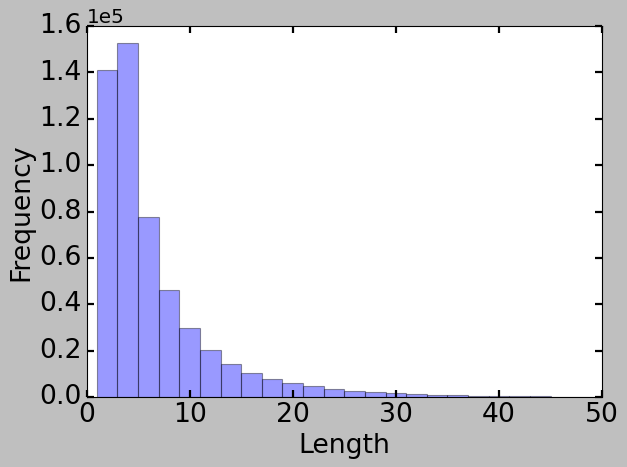

In [47]:
ax = plt.axes()
sns.distplot(loop_length_list[0], kde=False,  bins = np.arange(1,100,2))
plt.xlabel('Length', {'fontsize': 24})
plt.ylabel('Frequency', {'fontsize': 24})
plt.tick_params(axis = 'both', which = 'major', direction = 'in', length = 6, width = 2, labelsize = 24)
plt.tick_params(axis = 'both', which = 'minor', direction = 'in')
#plt.setp(plt.spines.values(), linewidth=2)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.yaxis.offsetText.set_fontsize(18)

ax.set_xlim(xmax = 50)
plt.style.use('classic')
plt.tight_layout()

#ax.set_xlim(xmax = 80)
plt.savefig('loop_dist_t=0')
plt.show()
#print(min(tie_list))

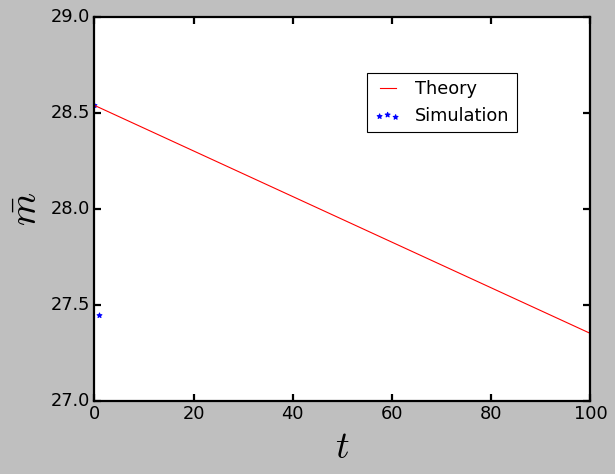

In [21]:
def fit(t, m0, sigma, p):
    return m0 - sigma**2*p*t    #m0*np.exp(-p*t) Poisson

ax = plt.axes()
m0 = 28.54
sigma = 10.9
p = 0.0001
fit_value = [fit(t,m0,sigma,p) for t in time_list]

ax.plot(time_list, fit_value, color = 'r')
ax.scatter(time_list, avg_tie_length, color = 'b', marker = '*')
#ax.plot(time_list, fit_value, color = 'r')

plt.xlabel(r'$t$', {'fontsize': 34})
plt.ylabel(r'$\bar{m}$', {'fontsize': 34})

plt.legend(('Theory', 'Simulation'),
          shadow=False, loc=(0.55, 0.70), handlelength=1.5, fontsize=16)

ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 6, width = 2, labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', direction = 'in')
plt.setp(ax.spines.values(), linewidth=2)


ax.set_xlim(xmin = 0, xmax = 100)
ax.set_ylim(ymin = 27, ymax = 29)

#plt.style.use('classic')
#plt.tight_layout()
#plt.style.use('classic')
plt.savefig('m_vs_time')
plt.show()

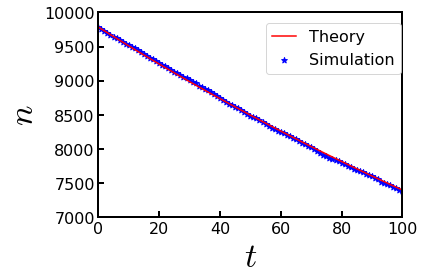

In [20]:
def fit(t, n0, p, sigma, m0):
    return n0*np.exp(-p*m0*t+sigma**2*p**2*t**2/2) #n0*np.exp(m0*(np.exp(-p*t) -1)) #Poisson

ax = plt.axes()
m0 = 28.54
n0 = 9785

fit_value = [fit(t,n0, p, sigma, m0) for t in time_list]

ax.scatter(time_list, no_of_ties, color = 'b', marker = '*')
ax.plot(time_list, fit_value, color = 'r')

plt.xlabel(r'$t$', {'fontsize': 34})
plt.ylabel(r'$n$', {'fontsize': 34})

plt.legend(('Theory', 'Simulation'),
          shadow=False, loc=(0.55, 0.70), handlelength=1.5, fontsize=16)

ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 6, width = 2, labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', direction = 'in')
plt.setp(ax.spines.values(), linewidth=2)

ax.set_xlim(xmin = 0, xmax = 100)
ax.set_ylim(ymin = 7000, ymax = 10000)

plt.tight_layout()
plt.style.use('classic')
plt.savefig('n_vs_time')
plt.show()

In [21]:
(tie0-tie1)/tie0

0.0031681144609095554

In [ ]:
p*28.54

In [ ]:
(loop0-loop1)/loop0

In [ ]:
p*6.18